In [64]:
import sys
sys.path.append('..')

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import keras

import bayesflow as bf

## Setup

In [66]:
two_moons = bf.benchmarks.TwoMoons()

In [67]:
num_train_simulations = 2048
num_val_simulations = 300
batch_size = 128
epochs = 150

In [68]:
train_dataset = bf.datasets.OfflineDataset(two_moons.sample(num_train_simulations), batch_size=batch_size)
val_dataset = bf.datasets.OfflineDataset(two_moons.sample(num_val_simulations), batch_size=100)

In [69]:
inference_network = bf.networks.CouplingFlow(subnet="mlp")

approximator = bf.Approximator(
    inference_network=inference_network,
    inference_variables=["parameters"],
    inference_conditions=["observables"],
)

In [70]:
learning_rate = keras.optimizers.schedules.CosineDecay(1e-3, epochs * train_dataset.num_batches, 1e-6)

In [71]:
optimizer = keras.optimizers.AdamW(
    learning_rate=learning_rate,
    clipnorm=1.0,
)

In [72]:
approximator.compile(optimizer=optimizer)

## Training

In [73]:
fit_history = approximator.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1279 - val_loss: -0.5277
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -0.7854 - val_loss: -0.9656
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -1.1549 - val_loss: -1.4058
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -1.2562 - val_loss: -1.4451
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: -1.5828 - val_loss: -1.5176
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -1.7944 - val_loss: -1.8949
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: -1.7799 - val_loss: -1.8421
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: -1.8216 - val_loss: -2.0044
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: -2.0344 - val_loss: -1.4740
Epoch 10/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -1.7033 - val_loss: -2.0680
Epoch 11/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -2.1193 - val_loss: -2.2173
Epoch 12/150
16/16 ━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -2.9570 - val_loss: -3.0154
Epoch 68/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: -2.9855 - val_loss: -2.9240
Epoch 69/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: -3.0275 - val_loss: -2.9328
Epoch 70/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.1280 - val_loss: -2.9658
Epoch 71/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: -3.0331 - val_loss: -3.1289
Epoch 72/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: -3.0665 - val_loss: -3.1412
Epoch 73/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -3.0591 - val_loss: -2.9868
Epoch 74/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.0939 - val_loss: -3.0340
Epoch 75/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.1048 - val_loss: -2.8444
Epoch 76/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: -2.9681 - val_loss: -3.0646
Epoch 77/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.1780 - val_loss: -3.0903
Epoch 78/150
16/16 ━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: -3.7206 - val_loss: -2.9474
Epoch 134/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.7364 - val_loss: -3.0777
Epoch 135/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: -3.7467 - val_loss: -3.0425
Epoch 136/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.7456 - val_loss: -3.0525
Epoch 137/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: -3.7568 - val_loss: -3.0070
Epoch 138/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: -3.7625 - val_loss: -3.0165
Epoch 139/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: -3.7599 - val_loss: -3.0540
Epoch 140/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -3.7681 - val_loss: -3.0088
Epoch 141/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: -3.7777 - val_loss: -3.0160
Epoch 142/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.7762 - val_loss: -2.9784
Epoch 143/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: -3.7801 - val_loss: -3.0272
Epoch 144/150
16/16 ━━━━

In [74]:
## Plot losses

## Validation

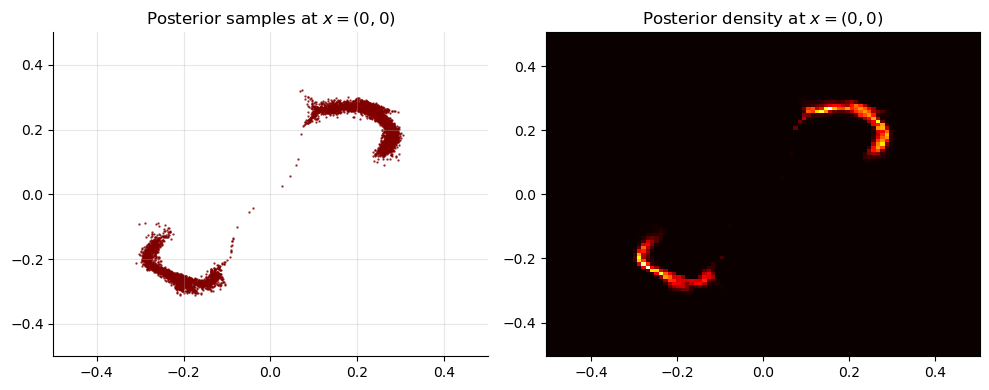

In [76]:
# Set the number of posterior draws you want to get
num_samples = 5000

# Prepare figure
f, axarr = plt.subplots(1, 2, figsize=(10, 4))

# Obtain amortized samples
obs_data = np.zeros((1, 2)).astype(np.float32)
samples = approximator.sample(num_samples=num_samples, data={"observables": obs_data}, numpy=True)

# Plot samples
axarr[0].scatter(samples["parameters"][:, 0], samples["parameters"][:, 1], color="maroon", alpha=0.75, s=0.5)
sns.despine(ax=axarr[0])
axarr[0].set_title(r"Posterior samples at $x=(0, 0)$")
axarr[0].grid(alpha=0.3)
axarr[0].set_xlim([-0.5, 0.5])
axarr[0].set_ylim([-0.5, 0.5])

# Compute log density on relevant posterior range
side = np.linspace(-0.5, 0.5, 100)
x, y = np.meshgrid(side, side)
obs_data_rep = np.zeros((10000, 2)).astype(np.float32)
params = np.c_[x.flatten(), y.flatten()]
lpdf = inference_network.log_prob(params, obs_data_rep)

# # Plot the density map using nearest-neighbor interpolation
axarr[1].pcolormesh(x, y, np.exp(lpdf).reshape(100, 100), cmap=cm.hot)
axarr[1].set_title(r"Posterior density at $x=(0, 0)$")

f.tight_layout()